Introduction
--------------

DICOM is the most popular standard used in medicine for image exchange. The name is derived from **D**igital **I**maging and **CO**mmunication in **M**edicine. It allows to have medical information in the images as a standard file that is independent from the manufacturer. This means that it is possible to have images from MR scanners made by a GE system and display it in a  picture archive system (PACS) from Agfa without any loss or without need of any proprietary information. It also allows opening the image in MATLAB, Python or any language without need to know how GE formatted the image file.

We will open here a DICOM image and see some of the information that is stored in the header of the image. You will have for your assignment to retrieve other information from this same image.

Python provides some tools for DICOM image opening in the package **PyDICOM**.

Your installation will likely be missing this package, so you can install it using Anaconda and **pip install pydicom**.

In [6]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('IM_0028.dcm')
# Let's print all the Metadata here
print(RefDs)




(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20120101'
(0008, 0013) Instance Creation Time              TM: '122531'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.2501708638.4193405253.2729028880.3304384116
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.3397498352.605445821.304410668.1378834227
(0008, 0020) Study Date                          DA: '20110101'
(0008, 0021) Series Date                         DA: '20110101'
(0008, 0022) Acquisition Date                    DA: '20110101'
(0008, 0023) Content Date                        DA: '20110101'
(0008, 0030) Study Time                          TM: '133916'
(0008, 0031) Series Time                         TM: '135504.20'
(0008, 0032) Acquisition Time    

You can browse through that Metadata and see all the information about this image. We can already easily find out this was a Magnetic Resonance Image made with a Philips system.

Let's answer the following questions with the Metadata:
* What is the size in pixels of the image? There are two ways to obtain this information, find them both.
* What is the number of bits used to encode the image?
* What is the full name of the vendor and the model of the scanner used to do this image?
* When was this image taken? Is this consistent with the file date?
* Which body part was the focus of the study? 
* Was the subject a man or a woman?
* Can you find the patient name in this particular example? Why?


In [7]:
from datetime import datetime

print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))
print('The anatomy imaged is '+str(RefDs.BodyPartExamined))
if RefDs.PatientsSex=='F':
    print('The patient imaged is Female')
else:
    print('The patient imaged is Male')
if RefDs.PatientsName=='':
    print('The patient\'s name is unkown')
else:
    print('The patient\'s name is '+str(RefDs.PatientsName))

The image is 512x512 pixels
The image was encoded with 12 bits 
The manufacturer is Philips Medical Systems and the model is Achieva
The image was made on 2011-01-01
The anatomy imaged is LIVER
The patient imaged is Female
The patient's name is unkown


Since this is an educational image, the volunteer's privacy is protected by never entering the name in the DICOM image. We can now exchange the image without any issues.

Let's now show the image. First, we need to dimension an array with all the pixels in the image. Then, we can load the information and then show the image.

[0, 511, 0, 511]

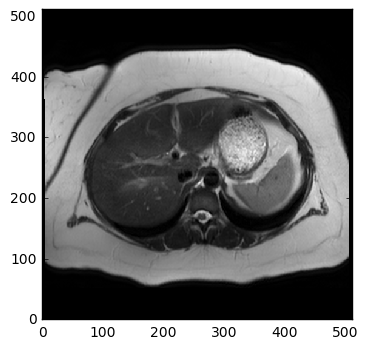

In [8]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0028.dcm')
ArrayDicom[:,:]=ds.pixel_array

plt.figure()
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.subplot(111)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

## Summary

In this example we learned how to open and display a DICOM image and how to access Metadata in the DICOM file.

Your work for this Notebook is:

* Add a title to the figure where you show the date of acquisition and the organ that was imaged (obtain this information from the metadata in the DICOM.

Comments and corrections welcome!

References
---------------

* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/